In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv("heart_disease_uci.csv", names=column_names, header=0)



In [2]:
df.replace('?', np.nan, inplace=True)
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')


df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)


In [3]:
# Convert target to binary classification (disease vs. no disease)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Normalize numerical features
numeric_features = ['age', 'trestbps', 'chol', 'thalach']
numeric_features = [feature for feature in numeric_features if feature in df.columns]
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [4]:
# Split the data
X = df[numeric_features]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6793478260869565
Confusion Matrix:
 [[52 23]
 [36 73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.69      0.64        75
           1       0.76      0.67      0.71       109

    accuracy                           0.68       184
   macro avg       0.68      0.68      0.68       184
weighted avg       0.69      0.68      0.68       184



In [5]:
importance = model.coef_[0]
parameters_of_interest = ['age', 'trestbps', 'chol', 'thalach']
parameters_of_interest = [param for param in parameters_of_interest if param in X.columns]
indices = [X.columns.get_loc(param) for param in parameters_of_interest]



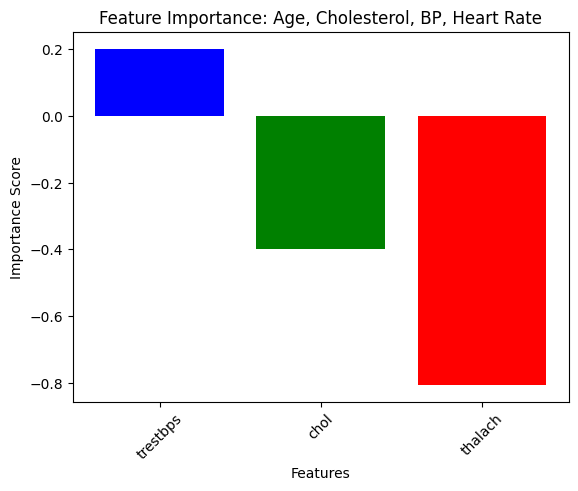

In [6]:
# Plot feature importance for specific parameters
plt.bar([parameters_of_interest[i] for i in range(len(indices))], [importance[idx] for idx in indices], color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance: Age, Cholesterol, BP, Heart Rate')
plt.xticks(range(len(indices)), parameters_of_interest, rotation=45)
plt.show()